In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Problem 1

In [3]:
# X = houseGrLivArea, y = houseSalePrice

In [4]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

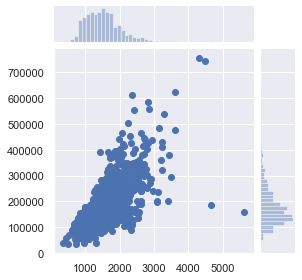

In [6]:
sb.jointplot(houseGrLivArea, houseSalePrice, height = 4)

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [8]:
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [9]:
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


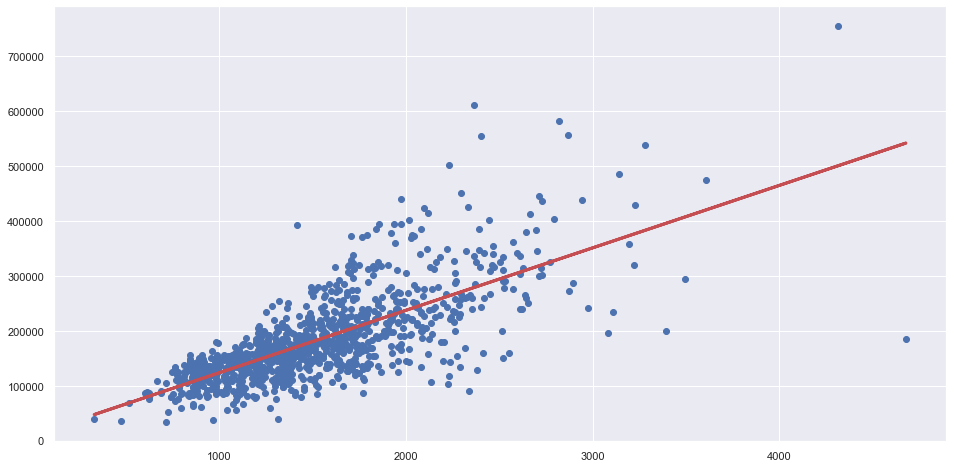

In [10]:
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

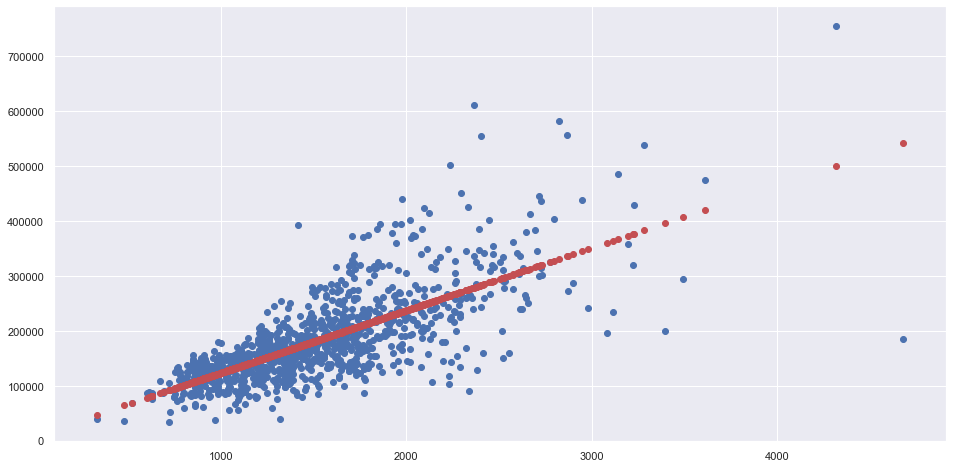

In [11]:
houseSalePrice_train_pred = linreg.predict(houseGrLivArea_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

In [12]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771


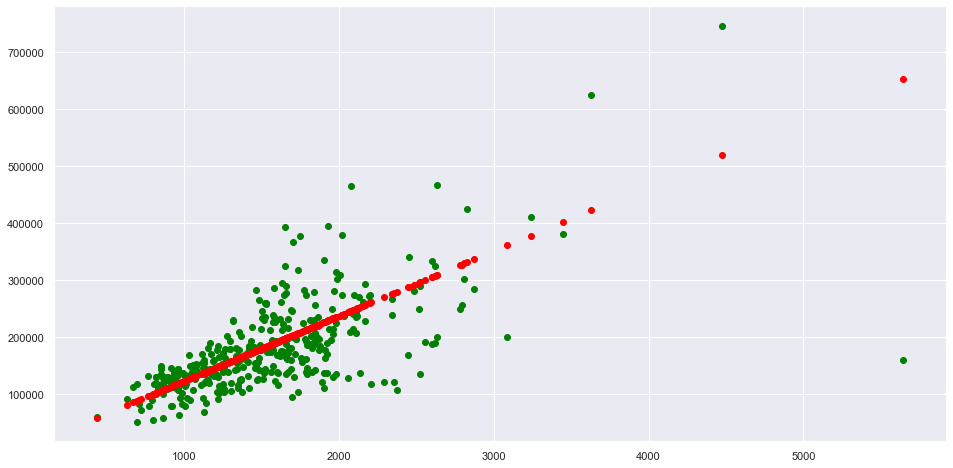

In [13]:
houseSalePrice_test_pred = linreg.predict(houseGrLivArea_test)


f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

In [14]:
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40117720006925806
Mean Squared Error (MSE) 	: 3737081522.296089
Root Mean Squared Error (RMSE) 	: 61131.67364219705


In [15]:
# Problem 2

In [16]:
houseLotArea = pd.DataFrame(houseData['LotArea'])
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
houseGarageArea = pd.DataFrame(houseData['GarageArea'])

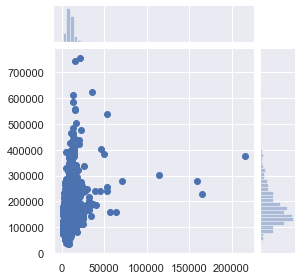

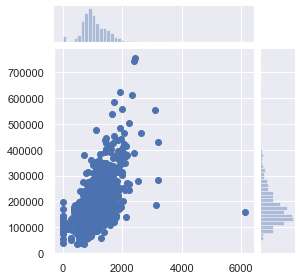

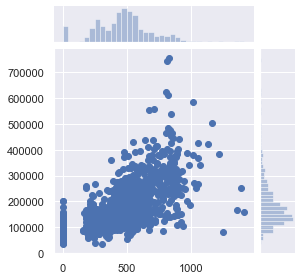

In [17]:
sb.jointplot(houseLotArea, houseSalePrice, height = 4)
sb.jointplot(houseTotalBsmtSF, houseSalePrice, height = 4)
sb.jointplot(houseGarageArea, houseSalePrice, height = 4)

In [18]:
houseLotArea_train = pd.DataFrame(houseLotArea[:1100])
houseTotalBsmtSF_train = pd.DataFrame(houseTotalBsmtSF[:1100])
houseGarageArea_train = pd.DataFrame(houseGarageArea[:1100])

houseLotArea_test = pd.DataFrame(houseLotArea[-360:])
houseTotalBsmtSF_test = pd.DataFrame(houseTotalBsmtSF[-360:])
houseGarageArea_test = pd.DataFrame(houseGarageArea[-360:])

print("Train Set :", houseLotArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseLotArea_test.shape, houseSalePrice_test.shape)

print("Train Set :", houseTotalBsmtSF_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseTotalBsmtSF_test.shape, houseSalePrice_test.shape)

print("Train Set :", houseGarageArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGarageArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)
Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)
Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [19]:
# X = houseLotArea, y = houseSalePrice

In [20]:
linreg.fit(houseLotArea_train, houseSalePrice_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


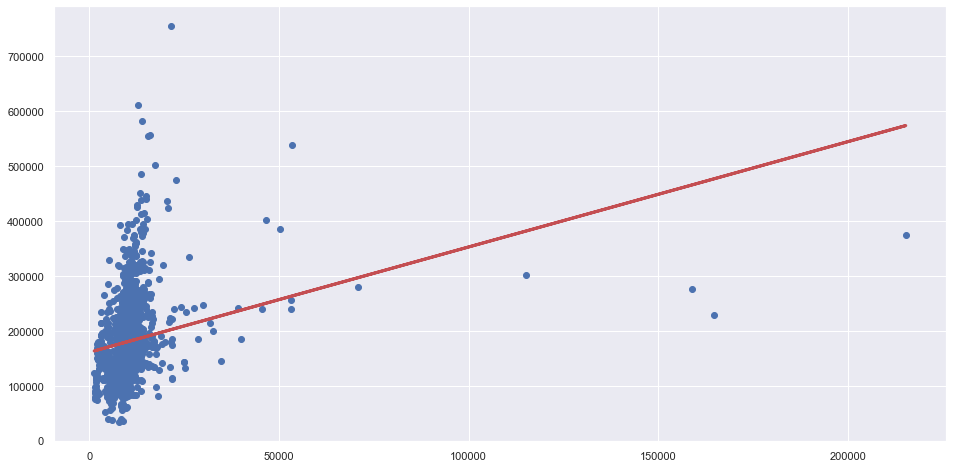

In [21]:
regline_x = houseLotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseLotArea_train

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

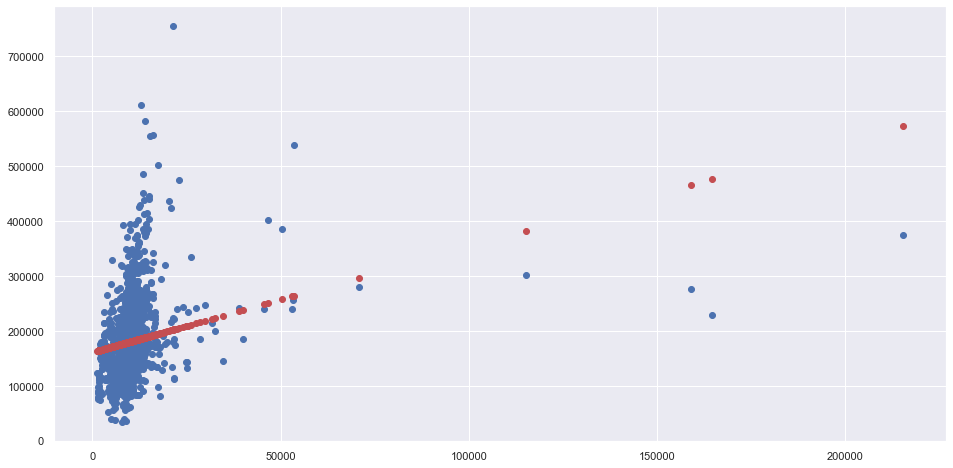

In [22]:
houseSalePrice_train_pred = linreg.predict(houseLotArea_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.scatter(houseLotArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

In [23]:
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_train, houseSalePrice_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.06996047063721678
Mean Squared Error (MSE) 	: 5885258821.936573
Root Mean Squared Error (RMSE) 	: 76715.44057056945


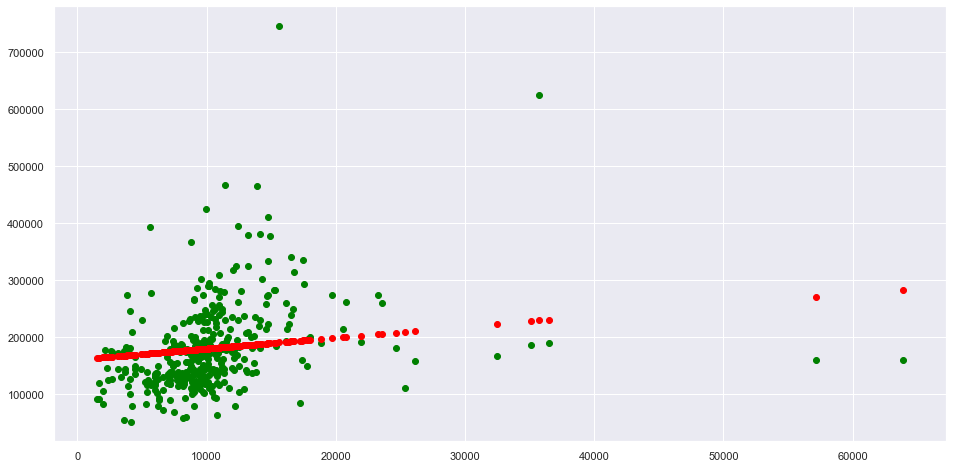

In [24]:
houseSalePrice_test_pred = linreg.predict(houseLotArea_test)


f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseLotArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseLotArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

In [25]:
print("Explained Variance (R^2) \t:", linreg.score(houseLotArea_test, houseSalePrice_test))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.0661786844889618
Mean Squared Error (MSE) 	: 5827711275.733227
Root Mean Squared Error (RMSE) 	: 76339.44770387867


In [26]:
# X = houseTotalBmstSF, y = houseSalePrice

In [27]:
linreg.fit(houseTotalBsmtSF_train, houseSalePrice_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]


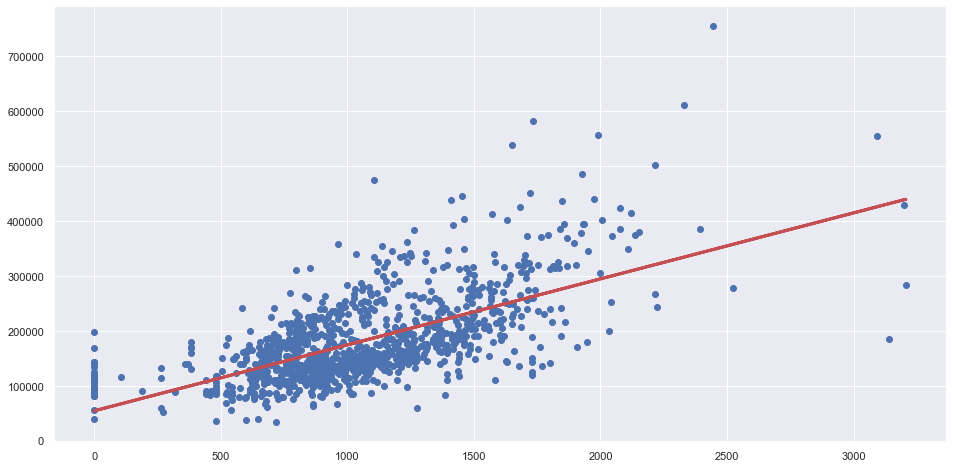

In [28]:
regline_x = houseTotalBsmtSF_train
regline_y = linreg.intercept_ + linreg.coef_ * houseTotalBsmtSF_train

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

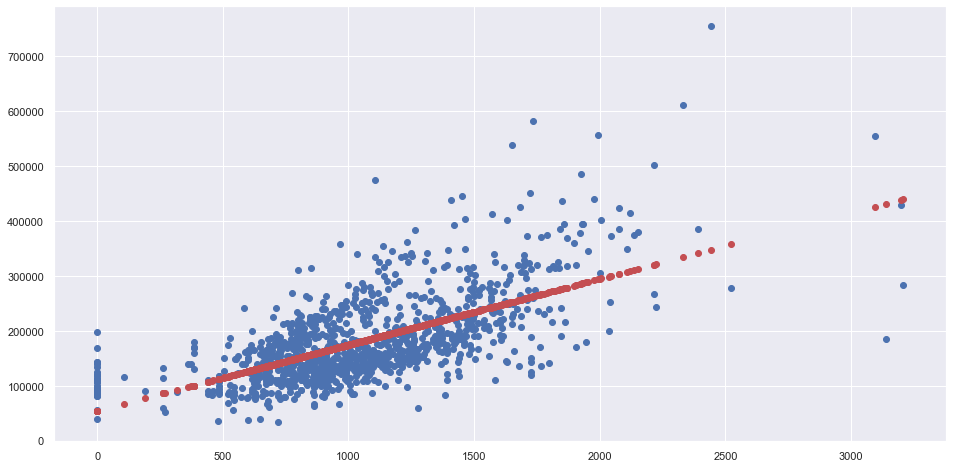

In [29]:
houseSalePrice_train_pred = linreg.predict(houseTotalBsmtSF_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train)
plt.scatter(houseTotalBsmtSF_train, houseSalePrice_train_pred, color = "r")
plt.show()

In [30]:
print("Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_train, houseSalePrice_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40965154133422405
Mean Squared Error (MSE) 	: 3735705165.951247
Root Mean Squared Error (RMSE) 	: 61120.41529596512


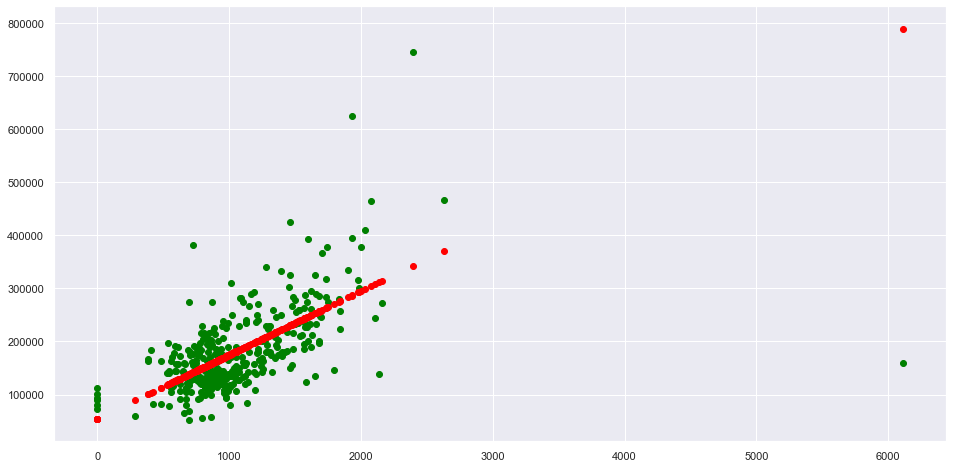

In [31]:
houseSalePrice_test_pred = linreg.predict(houseTotalBsmtSF_test)


f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test, color = "green")
plt.scatter(houseTotalBsmtSF_test, houseSalePrice_test_pred, color = "red")
plt.show()

In [32]:
print("Explained Variance (R^2) \t:", linreg.score(houseTotalBsmtSF_test, houseSalePrice_test))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.26305378699344206
Mean Squared Error (MSE) 	: 4599070168.790179
Root Mean Squared Error (RMSE) 	: 67816.44467819128


In [33]:
# X = houseGarageArea, y = houseSalePrice

In [34]:
linreg.fit(houseGarageArea_train, houseSalePrice_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]


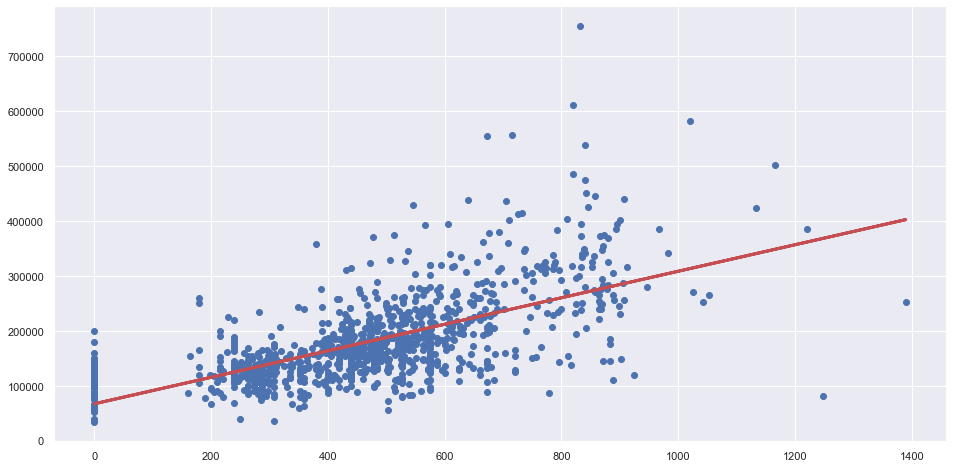

In [35]:
regline_x = houseGarageArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGarageArea_train

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

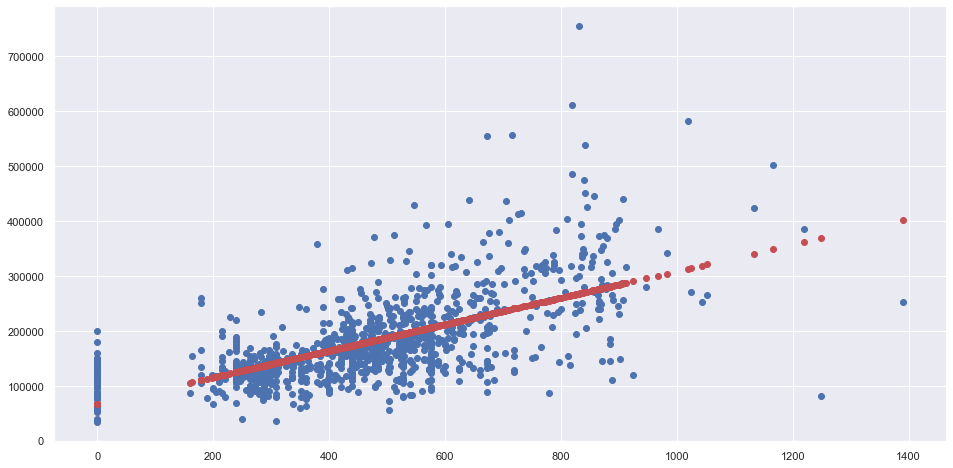

In [36]:
houseSalePrice_train_pred = linreg.predict(houseGarageArea_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGarageArea_train, houseSalePrice_train)
plt.scatter(houseGarageArea_train, houseSalePrice_train_pred, color = "r")
plt.show()

In [37]:
print("Explained Variance (R^2) \t:", linreg.score(houseGarageArea_train, houseSalePrice_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, houseSalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40526589947579356
Mean Squared Error (MSE) 	: 3763457359.9411807
Root Mean Squared Error (RMSE) 	: 61347.02405122176


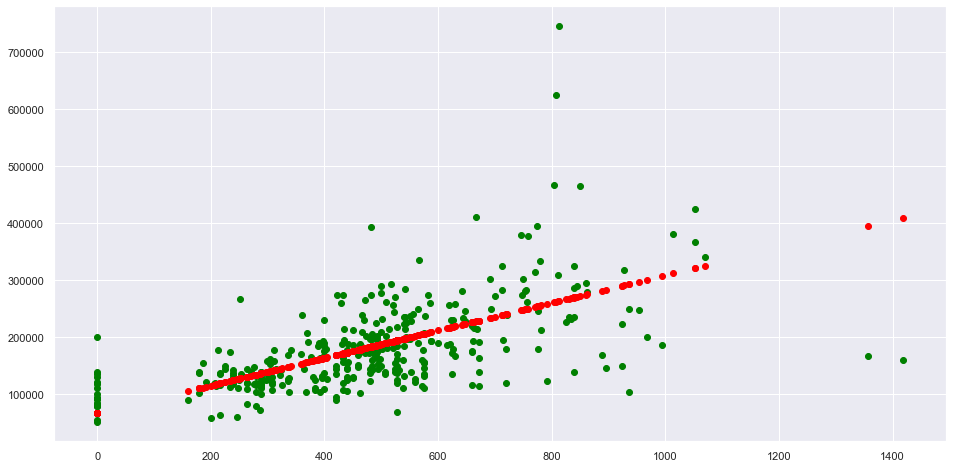

In [38]:
houseSalePrice_test_pred = linreg.predict(houseGarageArea_test)


f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGarageArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGarageArea_test, houseSalePrice_test_pred, color = "red")
plt.show()

In [39]:
print("Explained Variance (R^2) \t:", linreg.score(houseGarageArea_test, houseSalePrice_test))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test, houseSalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.33415894889143827
Mean Squared Error (MSE) 	: 4155323226.122655
Root Mean Squared Error (RMSE) 	: 64461.796640511464


In [ ]:
# Q: After four Uni-Variate Regressions (with four variables), comment which model is the best and why so

# A: The best model is the plot of houseSalePrice against houseGrLivArea.
#    This is because its test set has the highest explained variance (R^2), and the lowest mean squared error (MSE).
